In [2]:
import string

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.stats import kendalltau, pearsonr, spearmanr

In [19]:
df = pd.read_csv("final_scores.csv", index_col=0)

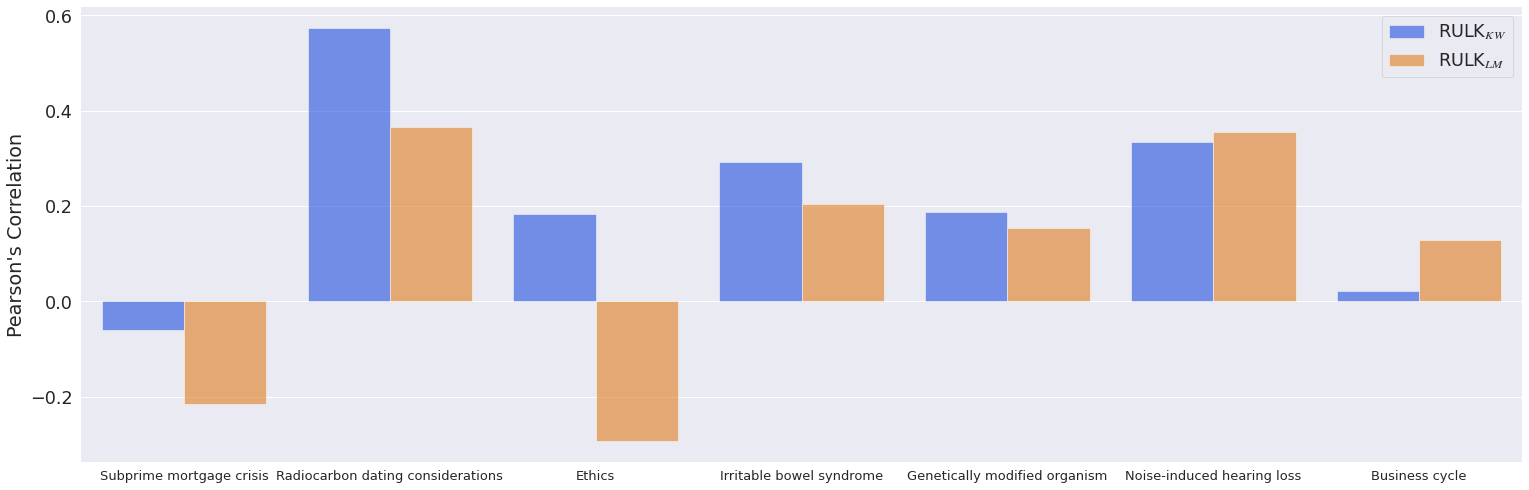

In [228]:
def by_category(df, col, splits=4):
    return_df = []
    values = df[col].unique()
    for v in values:
        p_df = df[df[col] == v]
        corr_LM = pearsonr(p_df.LM_estimate, p_df.realized_learning_gain)
        corr_KW = pearsonr(p_df.KW_estimate, p_df.realized_learning_gain)
        corr_combi = pearsonr(p_df.COMBI_estimate, p_df.realized_learning_gain)

        # pairwise relevances
        rel = [r"", r"", r""]  # KW, LM, COMBI
        LM_KW = pearsonr(p_df.LM_estimate, p_df.KW_estimate)[1] < 0.005
        LM_Combi = pearsonr(p_df.LM_estimate, p_df.COMBI_estimate)[1] < 0.005
        KW_Combi = pearsonr(p_df.KW_estimate, p_df.COMBI_estimate)[1] < 0.005

        return_df.append({"Split": v, "Model": r"RULK$_{KW}$", "Correlation": corr_KW[0]})
        return_df.append({"Split": v, "Model": r"RULK$_{LM}$", "Correlation": corr_LM[0]})
        # return_df.append({"Split": v, "Model": r"$KW+LM$", "Correlation": corr_combi[0]})

    return pd.DataFrame(return_df)


cols_to_check = ["topic"]

xlabel = ["Topic"]

sns.set(rc={"font.family": "stixgeneral", "mathtext.fontset": "stix"})
for col, xlabel in zip(cols_to_check, xlabel):
    out_df = by_category(df, col)
    sns.set(style="darkgrid", palette="bright", rc = {'figure.figsize':(20,5)})
    sns.set_context("paper", font_scale=2, rc={"grid.linewidth": 1.0, "lines.linewidth": 2})
    g = sns.catplot(data=out_df, kind="bar", x="Split", y="Correlation", hue="Model", alpha=0.6, height=6)
    g._legend.remove()
    plt.legend(loc="upper right")
    g.fig.set_size_inches(40, 8)
    g.set_xticklabels(size=13)
    g.despine(left=True)
    g.set(xlabel=None, ylabel="Pearson's Correlation")

    # ax = g.facet_axis(0,0)

#     flat_labels = []
#     for i in range(len(relevances[0])):
#         flat_labels += [x[i] for x in relevances]
#     for p, label in zip(ax.patches, flat_labels):
#         ax.text(p.get_x()+0.1, p.get_height()*1.02, label, size='small')

In [24]:
df.head()

,absolute_learning_gain,realized_learning_gain,type,average_query_len,number_of_queries,number_of_views,number_of_clicks,session_duration,one_two_to_four,one_two_to_three,...,topic,average_dwell_time,unique_docs,number_of_bookmars,education_level,search_time,LM_estimate,KW_estimate,COMBI_estimate,COMBI_05
user,,,,,,,,,,,,,,,,,,,,,
5ce456ea65535c0019185cd6,0.7,0.350000,control,5.500000,2,35,14,2407,3,1,...,Subprime mortgage crisis,22,12,9,Other,2086,0.900243,0.935620,0.922177,0.917931
56e06fde907c12000ae3ab94,1.1,0.550000,visual,2.750000,4,45,8,3835,5,1,...,Radiocarbon dating considerations,180,6,1,Bachelor's degree(s),1994,0.680282,0.854674,0.788405,0.767478
5d53ec22cb1bcf0015f59a65,1.0,0.526316,visual,1.833333,12,145,23,3399,4,1,...,Ethics,4,21,21,Bachelor's degree(s),2427,0.876992,0.980916,0.941425,0.928954
5cdd2cd048d5f100155fabce,1.0,0.500000,control,4.000000,4,45,9,2358,5,0,...,Subprime mortgage crisis,202,7,2,Bachelor's degree(s),1784,0.955865,0.969106,0.964074,0.962485
5d78fcd59066d90001a4977a,0.4,0.200000,visual,3.666667,9,95,15,2230,1,2,...,Radiocarbon dating considerations,91,15,7,Bachelor's degree(s),1773,0.736500,0.769146,0.756740,0.752823


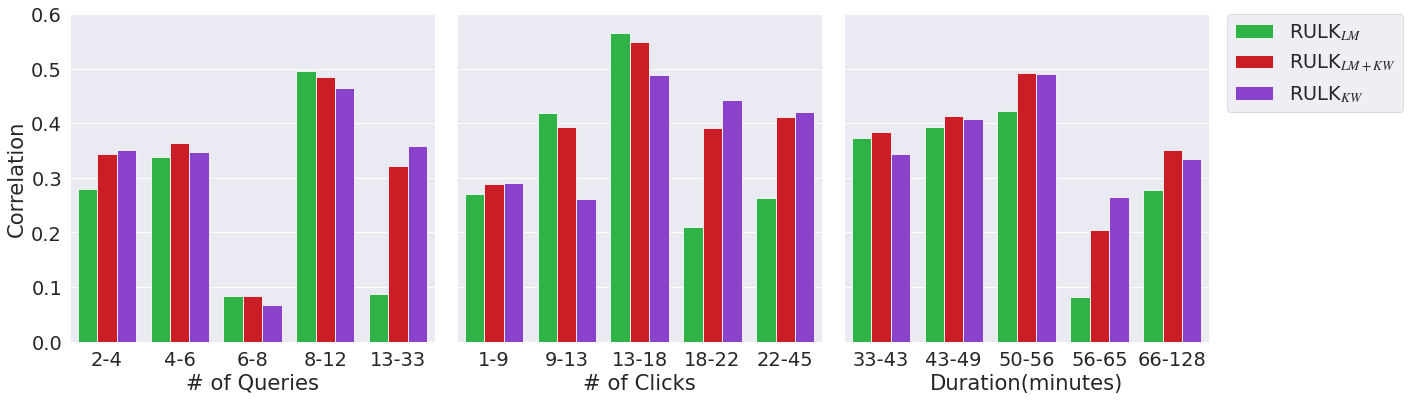

In [30]:
import matplotlib.ticker as ticker

df = pd.read_csv("final_scores.csv", index_col=0)
def by_percentile(df, col, splits=5):
    return_df = []
    frac = 1.0 / splits
    for i in range(splits):
        floor = df[col].quantile(frac * i)
        ceil = df[col].quantile(frac * (i + 1))
        p_df = df[(df[col] >= floor) & (df[col] <= ceil)]
        _min = p_df[col].min()
        _max = p_df[col].max()
        y = p_df.realized_learning_gain
        if (y == y[0]).all():
            corr_LM = np.NaN
            corr_KW = np.NaN
        else:
            x = p_df.LM_estimate
            corr_LM = np.NaN if (x == x[0]).all() else pearsonr(x, y)[0]
            x = p_df.KW_estimate
            corr_KW = np.NaN if (x == x[0]).all() else pearsonr(x, y)[0]            
            x = p_df.COMBI_estimate
            corr_mix = np.NaN if (x == x[0]).all() else pearsonr(x, y)[0]            
        col_name = col.replace("number_of_", "").replace("_", "-").replace("session-", "").capitalize()
        if "Duration" in col_name:
            col_name += "(minutes)"
        else:
            col_name = "# of " +col_name
            
        # return_df.append({"Percentile": f"{int((frac*(i+1))*100)}%", "Variable": col_name, "Correlation": corr_KW, "Method": r"RULK$_{KW}$"})
        # return_df.append({"Percentile": f"{int((frac*(i+1))*100)}%", "Variable": col_name, "Correlation": corr_LM, "Method": r"RULK$_{LM}$"})
        # return_df.append({"Percentile": f"{int((frac*(i+1))*100)}%", "Variable": col_name, "Correlation": corr_mix, "Method": r"RULK$_{LM+KW}$"})
        
        if col == "session_duration":
            _min = _min//60
            _max = _max//60
        return_df.append({"Percentile": f"{_min}-{_max}", "Variable": col_name, "Correlation": corr_LM, "Method": r"RULK$_{LM}$"})
        return_df.append({"Percentile": f"{_min}-{_max}", "Variable": col_name, "Correlation": corr_mix, "Method": r"RULK$_{LM+KW}$"})
        return_df.append({"Percentile": f"{_min}-{_max}", "Variable": col_name, "Correlation": corr_KW, "Method": r"RULK$_{KW}$"})

        larger = max(corr_KW, corr_LM)
        smaller = min(corr_KW, corr_LM)
        diff = (larger-smaller)/larger

    return_df = pd.DataFrame(return_df).fillna(method="ffill")
    
    return return_df


cols = ["number_of_queries", "number_of_clicks", "session_duration"]
dfs = []
for col in cols:
    dfs.append(by_percentile(df, col))
full_df= pd.concat(dfs, ignore_index=True)


customPalette = sns.set_palette(sns.color_palette("bright")[2:])
sns.set(style="darkgrid", palette=customPalette, rc = {'figure.figsize':(20,6) , "figure.autolayout": True})
sns.set_context("paper", font_scale=2.2, rc={"grid.linewidth": 1.0, "lines.linewidth": 2})
fig, axes = plt.subplots(1, 3)

for idx, (ax, c) in enumerate(zip(axes, ['# of Queries', '# of Clicks', 'Duration(minutes)'])):
    _df = full_df[full_df.Variable==c]
    sns.barplot(data=full_df[full_df.Variable==c], x="Percentile", y="Correlation", hue="Method", ax=ax)
    ax.set_ylim(0,0.6)
    ax.set_xlabel(None)
    if idx == 0:
        ax.set_ylabel("Correlation")
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    if idx == 2:
        ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    else:
        ax.get_legend().remove()
    # ax.legend(title=c, loc="lower right")
    # if idx < 2:
        # ax.set_xticklabels([])
    # else:
    ax.set_xlabel(c)
    
# ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

    # (xlabel="Session Duration Percentile", ylabel="Pearson's Correlation")

# plt.legend(loc="upper right")
# ax.set(xlabel="Session Duration Percentile", ylabel="Pearson's Correlation")
# ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [26]:
full_df.Variable.unique()

array(['# of Queries', '# of Clicks', 'Duration(minutes)'], dtype=object)

In [310]:
avg_df = full_df.groupby(["Variable", "Percentile"]).mean()

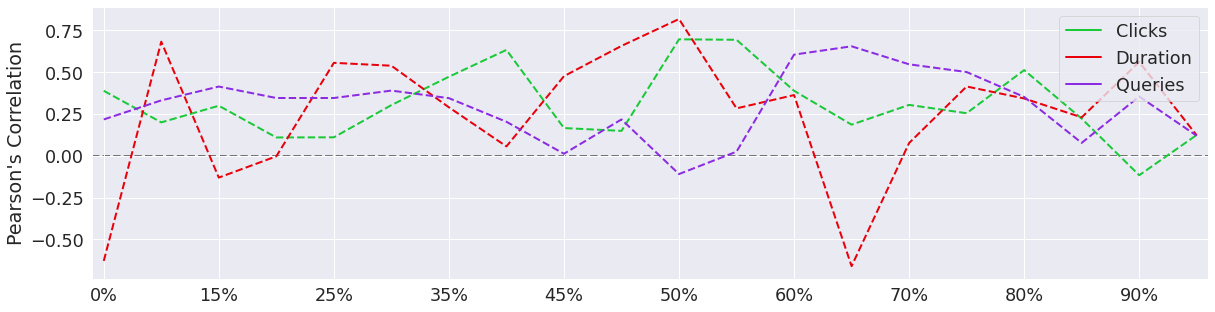

In [313]:
customPalette = sns.set_palette(sns.color_palette("bright")[2:])
ax = sns.lineplot(data=avg_df, x="Percentile", y="Correlation", hue="Variable", palette=customPalette)
plt.legend(loc="upper right")
ax.set(xlabel=None, ylabel="Pearson's Correlation")
plt.xlim(-0.2,19.2)
plt.axhline(0.0, zorder=0, color="black", alpha=0.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
# plt.axhline(0.0, zorder=0, color="black", alpha=0.5)
for line in ax.lines:
    line.set_linestyle("--")

In [206]:

# sns.color_palette()
